In [1]:
!pip install -q decord

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [9]:
from transformers import AutoProcessor, AutoModelForCausalLM
import torch

from huggingface_hub import hf_hub_download
from PIL import Image

In [3]:
# video captioning
processor = AutoProcessor.from_pretrained("microsoft/git-base-vatex")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-vatex")

In [18]:
from ipywidgets import Video
from huggingface_hub import hf_hub_download

file_path = hf_hub_download(repo_id="nielsr/video-demo", filename="eating_spaghetti.mp4", repo_type="dataset")
#file_path = "1_224p.mkv"
Video.from_file(file_path, width=500)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free...', width='500')

In [19]:
num_frames = model.config.num_image_with_embedding
print(num_frames)

6


In [20]:
import numpy as np
from decord import VideoReader, cpu

def sample_frames(file_path, num_frames):
    # set seed for reproducability
    np.random.seed(45)

    def sample_frame_indices(clip_len, frame_sample_rate, seg_len):
        converted_len = int(clip_len * frame_sample_rate)
        end_idx = np.random.randint(converted_len, seg_len)
        start_idx = end_idx - converted_len
        indices = np.linspace(start_idx, end_idx, num=clip_len)
        indices = np.clip(indices, start_idx, end_idx - 1).astype(np.int64)
        return indices

    # video clip consists of 300 frames (10 seconds at 30 FPS)
    videoreader = VideoReader(file_path, num_threads=1, ctx=cpu(0))

    # sample 6 frames
    videoreader.seek(0)
    indices = sample_frame_indices(clip_len=num_frames, frame_sample_rate=4, seg_len=len(videoreader))
    frames = videoreader.get_batch(indices).asnumpy()

    return list(frames)

frames = sample_frames(file_path, num_frames)

In [59]:
import imageio

video = imageio.get_reader('1_224p.mkv', "ffmpeg")
frames = [np.array(video.get_data(i)) for i in range(0, 60, 10)]
#frames

In [60]:
frames[0].shape

(224, 398, 3)

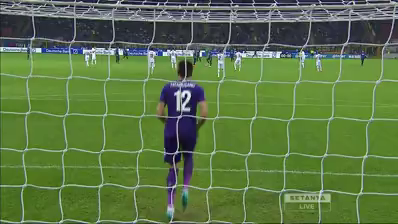

In [25]:
# visualize first sampled frame
Image.fromarray(frames[0])

In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [27]:
# move model to GPU
model.to(device)
# prepare frames for the model
inputs = processor(images=frames, return_tensors="pt").to(device)

generated_ids = model.generate(pixel_values=inputs.pixel_values, max_length=50)

print("Generated caption:", processor.batch_decode(generated_ids, skip_special_tokens=True))

Generated caption: ['a player runs and kicks a ball into the goal.']


### test set

In [41]:
import boto3
import config
from dataloader import SNV3Dataset, collate_fn
from torch.utils.data import Dataset, DataLoader
import time

session = boto3.Session(
    aws_access_key_id=config.aws_access_key_id,
    aws_secret_access_key=config.aws_secret_access_key,
)
s3 = session.resource('s3')
test_ds = SNV3Dataset(split='test',
                  bucket='soccernet-230',
                  vocab_path='vocab_files/train_vocab.pyi',
                  num_clips=1,
                  include_vid=True)
test_dl = DataLoader(test_ds, collate_fn=collate_fn, batch_size=1, num_workers=80)

Reading the annotation files


 44%|████▎     | 24/55 [00:05<00:04,  6.70it/s]

Cannot find game: france_ligue-1/2016-2017/2016-11-30 - 23-00 Paris SG 2 - 0 Angers


100%|██████████| 54/54 [00:00<00:00, 29774.21it/s]


In [42]:
start_time = time.time()
i = 0
for example in test_dl:
    print('PRINTING EXAMPLE============')
    print(len(example))
    #print(example[0])
    print(example['embed'].shape)
    print(example['caption'].shape)
    print(example['clip'].shape)
    print(example['caption'])
    print(test_ds.text_processor.detokenize(example['caption']))
    print("time for one batch: ", time.time()-start_time)
    
    frames = example['clip'][0]
frames = [frames[i] for i in range(6, 12)]
inputs = processor(images=frames, return_tensors="pt").to(device)

    generated_ids = model.generate(pixel_values=inputs.pixel_values, max_length=50)

    print("Generated caption:", processor.batch_decode(generated_ids, skip_special_tokens=True))
#     i += 1
#     if i>3:
    break

KeyboardInterrupt: 

In [48]:
print(example['caption'].shape)
print(test_ds.text_processor.detokenize(example['caption'][0].tolist()))

torch.Size([1, 187])
[SOS] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] It 's a goal ! [PLAYER] ([TEAM]) scores with a brilliant shot into the bottom right corner after being released inside the box by a superb lofted pass from [PLAYER] . The score is now 1:0 . [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PA

In [82]:
frames = example['clip'][0]
frames = [frames[i] for i in range(6, 12)]
inputs = processor(images=frames, return_tensors="pt").to(device)

generated_ids = model.generate(pixel_values=inputs.pixel_values, max_length=50)

print("Generated caption:", processor.batch_decode(generated_ids, skip_special_tokens=True))

Generated caption: ['a soccer game is being played and a team is playing against each other.']


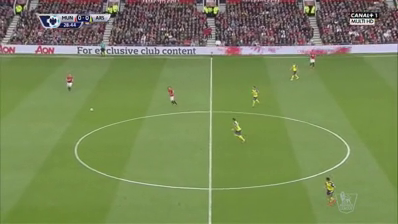

In [84]:
Image.fromarray(frames[5].numpy())